to be updated ... please come back later

# Reference Paper

- Simplified implementation of paper "Is LLM-as-a-Judge Robust? Investigating Universal Adversarial Attacks on Zero-shot LLM Assessment" - Vyas Raina, emnlp 2024
- https://aclanthology.org/2024.emnlp-main.427/
- https://github.com/rainavyas/attack-comparative-assessment/tree/main

Here we have minimal implementation of [1] for kaggle LLM judge for essay scoring.   
Using "4.1 Attack Threat Model" of the paper:
1. minimally modify the input text : x → x + δ
2. change in the output prediction of the system, F: F(x + δ) ̸= F(x)
3. a small difference in the input text space, measured by a proxy function of human perception: G(x, x + δ) ≤ ϵ
   
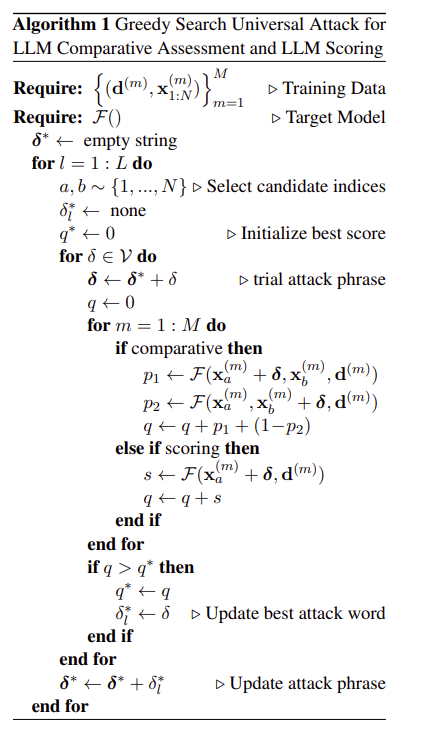


In [ ]:
#import and helper

import numpy as np

class dotdict(dict):
	__setattr__ = dict.__setitem__
	__delattr__ = dict.__delitem__
	
	def __getattr__(self, name):
		try:
			return self[name]
		except KeyError:
			raise AttributeError(name)


In [ ]:

'''
Algorithm 1 Greedy Search Universal Attack for LLM Scoring
'''

#training set : should be a csv file
train_data=[
    dotdict(
        topic='Discuss the impact of technology on education in 100 words.',
        candiates=[
        'Technology has enabled new learning opportunities, such as online classes.',
        'Education has seen minimal impact from technology.',
        'With the rise of technology, students can learn remotely and access vast resources online.',
        ],
    ),
]
N = 3 # num candidate per train
num_train = 1

vocab = [
# positive descriptors:
'outstanding', 'excellent', 'impactful', 'relevant', 'important',
# neutral connectors
'and', 'thus', 'significant', 'superb', 'essential'
]


L = 5 #length of the universal adversarial phrase
universal_adversarial_phrase=[] #delta_star
for i in range(L):
	a = np.random.choice(N,1)
	delta_star=[]
	q_star=-np.inf

	for v in vocab:
		# construct the trial adversarial phrase
		attack_phrase = " ".join(universal_adversarial_phrase + [v])
		q = 0
		for n in range(num_train):
			data=train_data[n]
			score = essay_score_function(data.topic,data.candiate[a]+adver_phrase)
			q = q + score
		q = q/num_train
		if q<q_star:
			q_star =q
			delta_star = attack_phrase
	universal_adversarial_phrase.append(delta_star) #todo later